In [2]:
import time
start_time = time.time()

# Cleaning data - changing everything into neumeric value

In [3]:
import pandas as pd 
import ast
from ast import literal_eval
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

#setting the file we want to read
file = "train.csv"

#reading from CSV
df = pd.read_csv(file, header= 0, quotechar='"', sep=',', encoding = "ISO-8859-1",keep_default_na=True, 
                dtype = { 'belongs_to_collection' : 'category',  'genres' : 'category', 'original_language' : 'category', 'production_companies' : 'category', 'production_countries' : 'category',  'spoken_languages' : 'category', 'Keywords' : 'category', 'cast' : 'category', 'crew' : 'category'},
                na_values = [0]
                )

#setting the list to be edited
dataList = [ 'belongs_to_collection',  'genres', 'production_companies', 'production_countries',  'spoken_languages', 'Keywords', 'cast', 'crew']
dataID = { 'belongs_to_collection' : 'id',  'genres': 'id', 'production_companies': 'id', 'production_countries': 'iso_3166_1',  'spoken_languages': 'iso_639_1', 'Keywords': 'id', 'cast': 'id', 'crew': 'id'}
dataNeeded = ['id', 'belongs_to_collection', 'budget', 'genres', 'original_language',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'Keywords',
       'cast', 'crew', 'revenue']

#dropping the columns that was not needed
for col in df.keys():
    if not (col in dataNeeded) :
        df = df.drop(columns = col)
        
#http://www.maths.bath.ac.uk/~jjf23/LMR/python/missing.html

fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(~df.isna(), aspect='auto')
label = df.keys().tolist()
plt.imshow(~df.isna(), aspect='auto')
plt.xlabel("col")
plt.ylabel("samples")
ax.set_xticks(np.arange(len(label)))
ax.set_xticklabels(label)
fig.autofmt_xdate()
plt.title("Plot of missing data")
plt.gray()
plt.show()

#filling empty list with []
for col in dataList :
    try:
        df[col] = df[col].cat.add_categories('[]',inplace = False)
    except:
        pass
    df[col].fillna( '[]' , inplace = True) 

#changing a sting of list into list
for col in dataList :
    df[[col]] = df[[col]].applymap(literal_eval)     

#changing the dict in the list into ID only
for col in dataList : 
    for row in range(len(df)) :
        for num in range(len(df[col][row])) :
            if not (isinstance(df[col][row][num], int) or isinstance(df[col][row][num], str)):
                df[col][row][num] = df[col][row][num][dataID[col]]    

# getting all unique values
uniqueSpokenLanguage = df['spoken_languages'].apply(pd.Series).stack().value_counts().keys().values.tolist()
for row in range(len(df)) :
    for num in range(len(df['spoken_languages'][row])):
        df['spoken_languages'][row][num] = uniqueSpokenLanguage.index(df.spoken_languages[row][num])

uniqueOrgLanguage = df['original_language'].unique().tolist()
df.original_language = df.original_language.replace(uniqueOrgLanguage,range(len(uniqueOrgLanguage)))

uniqueCountries = df['production_countries'].apply(pd.Series).stack().value_counts().keys().values.tolist()

for row in range(len(df)) :
    for num in range(len(df['production_countries'][row])):
        df['production_countries'][row][num] = uniqueCountries.index(df.production_countries[row][num])
print(time.time() - start_time)
df.head()

<Figure size 2000x1000 with 1 Axes>

21.239671230316162


,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,Keywords,cast,crew,revenue
0,1,[313576],14000000.0,[35],0,6.575393,"[4, 60, 8411]",[0],2/20/15,93.0,[0],"[4379, 9663, 11830, 179431]","[52997, 64342, 54729, 36801, 54812, 94098, 115...","[1449071, 3227, 347335, 347335, 57822, 1451395...",12314651
1,2,[107674],40000000.0,"[35, 18, 10751, 10749]",0,8.248895,[2],[0],8/6/2004,113.0,[0],"[2505, 4263, 6038, 13072]","[1813, 5823, 1210, 655, 33656, 62064, 68287, 1...","[1201, 1214, 4500, 8851, 12970, 38415, 38416, ...",95149435
2,3,[],3300000.0,[18],0,64.299990,"[2266, 3172, 32157]",[0],10/10/2014,105.0,[0],"[1416, 1523, 1640, 2176, 14512, 14819, 33896, ...","[996701, 18999, 129104, 970216, 223012, 159366...","[494, 6745, 9250, 23783, 23786, 53181, 52443, ...",13092000
3,4,[],1200000.0,"[53, 18]",1,3.174936,[],[5],3/9/2012,122.0,"[0, 8]","[10092, 10540, 11734, 14536, 14636, 208364, 22...","[35068, 85047, 1021524, 1093644, 86033, 92686,...","[95510, 95510, 95510]",16000000
4,5,[],NaN,"[28, 53]",2,1.148070,[],[15],2/5/2009,118.0,[11],[],"[84751, 64453, 84752, 1130534]","[84749, 84749]",3923970


In [6]:
#changing the time into numerical value

import multiprocessing
from multiprocessing import Pool
import CleaningFunctions
from functools import partial
from IPython.display import display, clear_output
import math

start_time = time.time()

if __name__ ==  '__main__': 
  
    iterable = range(len(df))
    pool = multiprocessing.Pool(len(dataList))
    func = partial(CleaningFunctions.time2num, df)
    result = pool.map(func, iterable)
    pool.close()
    pool.join()
    print(time.time() - start_time)

df["release_date"] = result

Using TensorFlow backend.


247.60421991348267


In [22]:
# save to save.csv
df.to_csv('save_ORG.csv',index_label = False)
df = pd.read_csv('save_ORG.csv')
for col in dataList :
    df[[col]] = df[[col]].applymap(literal_eval) 

# Getting only low variance value for vectors that is too large to compute

In [23]:
import os
import statistics
if(False):
#if(os.path.isfile('Performance.csv')):
    PerformanceDF = pd.read_csv('Performance.csv')
else:
    PerformanceDF = pd.DataFrame(columns=['col','id', 'mean', 'var'])
    for col in dataList:
        print(col)
        
        #collect all revenue for each crew
        
        Rev_List = {}
        for x in range(len(df)):
            if not (isinstance(df[col][x], float )):
                for y in range( len(df[col][x])):
                    if (df[col][x][y] not in Rev_List):
                        list = []
                        Rev_List.update( {df[col][x][y]: list} )
                    Rev_List[df[col][x][y]].append(df["revenue"][x])

        #calculate the variance of revenue for each crew
        for id in Rev_List.keys():
            if (len(Rev_List[id]) > 2):
                PerformanceDF = PerformanceDF.append({"col": col,"id" : id, 'var':np.var(Rev_List[id]), 'mean' : statistics.mean(Rev_List[id])},ignore_index=True)
            else : 
                PerformanceDF.append({"id" : col+str(id) },ignore_index=True)
    PerformanceDF.to_csv('Performance.csv',index_label = False)

belongs_to_collection
genres
production_companies
production_countries
spoken_languages
Keywords
cast
crew


In [24]:
PerformanceDF.head()

,col,id,mean,var
0,belongs_to_collection,1575,176840916,4.003317e+15
1,belongs_to_collection,9735,41211249,1.108604e+15
2,belongs_to_collection,90863,283244966,2.084164e+15
3,belongs_to_collection,8354,584865942,4.215160e+16
4,belongs_to_collection,645,302243560,4.831786e+16


# Do not run the following 2 cells

In [47]:
def Getting3MostRelated(df,col):           
    
    Performance = pd.read_csv('Performance.csv')

    #creat the 3 new columns
    length = len(df)
    data = {}
    for a in range(dataList_expendsize[col]):
        data.update({col+str(a)+"_mean":range(length), col+str(a)+"_var":range(length)})
 
    df_temp = pd.DataFrame(data) 

    # get the value for each 3 columns
    SearchList = Performance["id"].tolist()
    for x in range(len(df)):
        if (True): #lol
            sub_var = []
            if not isinstance(df[col][x], float): #if the df is not nan for col,x
                for id in df[col][x]:
                    
                    index = PerformanceDF.loc[(PerformanceDF['col'] == col) & (PerformanceDF['id'] == id) ].index
                    print(index)
                    if not (len(index) == 0):
                        print(index[0])
                        sub_var.append([Performance["mean"][index[0]],Performance["var"][index[0]]]) 
                    # get the list of variance for each crew in this cell
                    
                sub_var = sorted(sub_var, key=takeSecond)
                
                min_item = []
                for a in range(dataList_expendsize[col]):
                    if(len(sub_var)>0):
                        min_item.append(sub_var[0])
                        sub_var.remove(sub_var[0])     
                    else:
                        min_item .append([np.nan,np.nan])

                for count in range(len(min_item)):
                    name = col +str(count)

                    df_temp[name+"_mean"][x] = min_item[count][0]
                    df_temp[name+"_var"][x] = min_item[count][1]

    return df_temp, col

In [48]:

dataList_expendsize = { 'belongs_to_collection':1,  'genres':3, 'production_companies':3, 'production_countries':3,  'spoken_languages':3, 'Keywords':3, 'cast':3, 'crew':3}

orgDF = pd.read_csv('save_ORG.csv')

for col in dataList :
    orgDF[[col]] = orgDF[[col]].applymap(literal_eval)     

def takeSecond(elem):
    return elem[1]
    
abc = Getting3MostRelated(df,"belongs_to_collection")

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([0], dtype='int64')
0
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([1], dtype='int64')
1
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([2], dtype='int64')
2
Int64Index([], dtype='int64')
Int64Index([3], dtype='int64')
3
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([4], dtype='int64')
4
Int64Index([1], dtype='int64')
1
Int64Index([], dtype='int64')
Int64Index([5], dtype='int64')

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



5
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([2], dtype='int64')
2
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([6], dtype='int64')
6
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([7], dtype='int64')
7
Int64Index([8], dtype='int64')
8
Int64Index([], dtype='int64')
Int64Index([6], dtype='int64')
6
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([5], dtype='int64')
5
Int64Index([9], dtype='int64')
9
Int64Index([4], dtype='int64')
4
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([10], dtype='int64')
10
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Ind

In [50]:
# adding the extra columns for the most related crew

start_time = time.time()

if __name__ ==  '__main__': 
  
    iterable = dataList
    pool = multiprocessing.Pool(len(dataList))
    func = partial(CleaningFunctions.Getting3MostRelated, df)
    df_temp = pool.map(func, iterable)
    pool.close()
    pool.join()
    print(time.time() - start_time)
    
for bigCol in range(len(df_temp)):
    for smallCol in df_temp[bigCol][0]:
        df[smallCol] = df_temp[bigCol][0][smallCol]

247.1169261932373


In [51]:
#dropping the extra columns that was already extracted
for col in dataList:
    if(col in df):
        df = df.drop(columns=col)
df.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,1,14000000.0,0,6.575393,21964.75,93.0,12314651,NaN,NaN,60875742.0,...,26027656.0,1.362847e+14,20273220.0,1.670920e+14,13394693.0,8.045325e+12,13012443.0,6.325491e+13,20380993.0,7.318037e+13
1,2,40000000.0,0,8.248895,18114.75,113.0,95149435,NaN,NaN,45406073.0,...,115016606.0,1.284649e+15,58486780.0,2.378023e+15,38844585.0,1.120362e+15,48704215.0,1.185739e+15,96813765.0,1.997366e+15
2,3,3300000.0,0,64.299990,21831.75,105.0,13092000,NaN,NaN,45406073.0,...,19484547.0,5.081406e+14,48097087.0,2.180879e+15,4745780.0,3.485830e+13,32672509.0,3.628084e+14,32672509.0,3.628084e+14
3,4,1200000.0,1,3.174936,20886.75,122.0,16000000,NaN,NaN,45406073.0,...,NaN,NaN,NaN,NaN,16000000.0,0.000000e+00,16000000.0,0.000000e+00,16000000.0,0.000000e+00
4,5,NaN,2,1.148070,19758.75,118.0,3923970,NaN,NaN,68336641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking if the data make sense

In [52]:
# counting the unique value for each col (idk why i am doing this too lol)
unique_count = {}
for col in df:
    count = df[col].apply(pd.Series).stack().value_counts().tolist()
    unique_count.update({col: count})

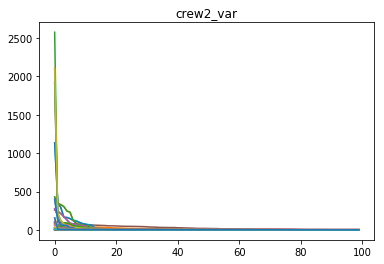

In [53]:
for col in unique_count:
    unique_count[col] = unique_count[col][0:100]
    plt.plot(unique_count[col])
    plt.title(col)

In [54]:
# save to save.csv
df.to_csv('save_BeforeNormalize.csv',index_label = False)
df = pd.read_csv('save_BeforeNormalize.csv')

In [55]:
df.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,1,14000000.0,0,6.575393,21964.75,93.0,12314651,NaN,NaN,60875742.0,...,26027656.0,1.362847e+14,20273220.0,1.670920e+14,13394693.0,8.045325e+12,13012443.0,6.325491e+13,20380993.0,7.318037e+13
1,2,40000000.0,0,8.248895,18114.75,113.0,95149435,NaN,NaN,45406073.0,...,115016606.0,1.284649e+15,58486780.0,2.378023e+15,38844585.0,1.120362e+15,48704215.0,1.185739e+15,96813765.0,1.997366e+15
2,3,3300000.0,0,64.299990,21831.75,105.0,13092000,NaN,NaN,45406073.0,...,19484547.0,5.081406e+14,48097087.0,2.180879e+15,4745780.0,3.485830e+13,32672509.0,3.628084e+14,32672509.0,3.628084e+14
3,4,1200000.0,1,3.174936,20886.75,122.0,16000000,NaN,NaN,45406073.0,...,NaN,NaN,NaN,NaN,16000000.0,0.000000e+00,16000000.0,0.000000e+00,16000000.0,0.000000e+00
4,5,NaN,2,1.148070,19758.75,118.0,3923970,NaN,NaN,68336641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Verification for the predicting method

In [56]:
#creating df df_pred to do prediction for those with non-nan values > 2000

predicting_list = []
for col in df:
    if (df[col].count() > 2000):
        predicting_list.append(col)
    else:
        print(col, df[col].count())
predicting_list.remove("revenue")

df_pred = pd.read_csv('save_BeforeNormalize.csv')
df_pred = df_pred[predicting_list].copy()

belongs_to_collection0_mean 132
belongs_to_collection0_var 132
genres2_mean 1428
genres2_var 1428
production_companies1_mean 1185
production_companies1_var 1185
production_companies2_mean 557
production_companies2_var 557
production_countries1_mean 716
production_countries1_var 716
production_countries2_mean 186
production_countries2_var 186
spoken_languages1_mean 860
spoken_languages1_var 860
spoken_languages2_mean 317
spoken_languages2_var 317


In [57]:
#creating a df_complete that was copied from the origional df with rows that have no missing value

completeList = []
for x in range(len(df)):
    flag = 0
    for col in predicting_list:
        if (np.isnan(df_pred[col][x])):
            flag = 1
    if flag == 0:
        completeList.append(x)      
        
df_complete = pd.DataFrame()
rows = df_pred.loc[completeList]
df_complete = df_complete.append(rows, ignore_index=True)

In [58]:
# calculating the missing rate of df_pred

missing = sum(len(df_pred) - df_pred.count())
assist = sum(df.count())

tar_miss_rate = missing/(missing+assist)
tar_miss_rate

0.11768974274805204

In [59]:
df_complete.columns

Index(['id', 'budget', 'original_language', 'popularity', 'release_date',
       'runtime', 'genres0_mean', 'genres0_var', 'genres1_mean', 'genres1_var',
       'production_companies0_mean', 'production_companies0_var',
       'production_countries0_mean', 'production_countries0_var',
       'spoken_languages0_mean', 'spoken_languages0_var', 'Keywords0_mean',
       'Keywords0_var', 'Keywords1_mean', 'Keywords1_var', 'Keywords2_mean',
       'Keywords2_var', 'cast0_mean', 'cast0_var', 'cast1_mean', 'cast1_var',
       'cast2_mean', 'cast2_var', 'crew0_mean', 'crew0_var', 'crew1_mean',
       'crew1_var', 'crew2_mean', 'crew2_var'],
      dtype='object')

In [60]:
#normalizing the testing set
from sklearn import preprocessing

# Normalize Training Data 
std_scale_fullset = preprocessing.StandardScaler().fit(df_complete)
x_train_norm = std_scale_fullset.transform(df_complete)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=df_complete.index, columns=df_complete.columns) 
df_complete.update(training_norm_col)

df_complete.head()

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,id,budget,original_language,popularity,release_date,runtime,genres0_mean,genres0_var,genres1_mean,genres1_var,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,-1.752638,1.203895,-0.114373,0.508276,-0.058339,1.559421,0.105725,-0.376268,-0.330591,-0.501267,...,1.026445,0.437114,0.203145,0.197191,1.549287,-0.193334,1.205060,0.202293,1.673414,-0.001246
1,-1.750298,-0.399301,-0.114373,-0.355141,0.236436,-1.308242,-0.236553,-0.432744,-0.330591,-0.501267,...,-0.539128,-0.351289,-0.681201,-0.363572,-0.158964,-0.288365,-0.411814,-0.328081,-0.298037,-0.320900
2,-1.746788,-0.272733,-0.114373,-0.052491,0.235919,-1.212654,0.098673,-0.054081,-0.330591,-0.501267,...,-0.328528,-0.307776,-0.601628,-0.323187,-0.276537,-0.285385,-0.228876,-0.136679,-0.181900,-0.225586
3,-1.735088,0.001498,-0.114373,-0.265860,-0.077457,-1.117065,0.098673,-0.054081,-0.330591,-0.501267,...,0.194131,-0.284038,-0.205026,-0.302171,-0.532500,-0.189980,-0.304935,-0.055530,-0.220199,-0.162017
4,-1.731577,0.950759,-0.114373,0.071202,1.200073,-0.304560,2.646756,2.994297,1.901320,2.044679,...,-0.080632,-0.147564,-0.263222,-0.213951,0.089535,-0.233378,0.095460,-0.296629,0.332631,-0.339469


In [61]:
# sampling from df_complete to creat df_complete_sampled for the same missing rate

import random

df_complete_sampled_list = []

for tar_miss_rate in range(6, 30, 4):
    
    tar_miss_rate = tar_miss_rate/100
    df_complete_sampled = df_complete.copy()
    
    exclude_id_colList = df_complete.columns.tolist()[1:]

    for x in range(len(df_complete)):
        for col in exclude_id_colList:
            rand = random.random()
            if (rand <= tar_miss_rate):
                df_complete_sampled[col][x] = np.nan
                
    df_complete_sampled_list.append(df_complete_sampled)

In [62]:
# seperating the col that we want to do MSE or Hit_Rate
col_Mse = ['id', 'budget', 'original_language', 'popularity', 'release_date',
       'runtime', 
       'production_companies0_mean', 'production_companies0_var',
       'production_countries0_mean', 'production_countries0_var',
       'spoken_languages0_mean', 'spoken_languages0_var', ]
           
col_Hit = ['id', 'genres0_mean', 'genres0_var', 'genres1_mean', 'genres1_var','Keywords0_mean',
       'Keywords0_var', 'Keywords1_mean', 'Keywords1_var', 'Keywords2_mean',
       'Keywords2_var', 'cast0_mean', 'cast0_var', 'cast1_mean', 'cast1_var',
       'cast2_mean', 'cast2_var', 'crew0_mean', 'crew0_var', 'crew1_mean',
       'crew1_var', 'crew2_mean', 'crew2_var']

In [63]:
#Reading the very original dataframe with things as list

orgDF = pd.read_csv('save_ORG.csv')

#changing a sting of list into list
for col in dataList :
    orgDF[[col]] = orgDF[[col]].applymap(literal_eval)     

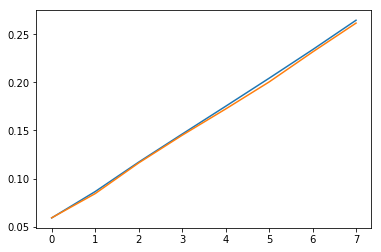

In [64]:
missing_rate_list = []
missing_rate_list_col_Hit = []
for df_complete_sampled in df_complete_sampled_list:

    # check df_complete_sampled geh missing rate

    missing = sum(len(df_complete_sampled) - df_complete_sampled.count())
    assist = sum(df_complete_sampled.count())

    miss_rate = missing/(missing+assist)
    missing_rate_list.append(miss_rate)
    #print("df_complete_sampled geh missing rate", miss_rate)
    
    # check df_complete_sampled geh missing rate

    missing = sum(len(df_complete_sampled[col_Hit]) - df_complete_sampled[col_Hit].count())
    assist = sum(df_complete_sampled[col_Hit].count())

    miss_rate = missing/(missing+assist)
    missing_rate_list_col_Hit.append(miss_rate)
    #print("df_complete_sampled with list col geh missing rate", missing,missing+assist,miss_rate)


#plt.plot(list(range(6, 30, 3)))
plt.plot(missing_rate_list)
plt.plot(missing_rate_list_col_Hit)

# Do Not run the following cell

In [89]:
import winsound

col_Mse = ['id', 'budget', 'original_language', 'popularity', 'release_date',
       'runtime', 
       'production_companies0_mean', 'production_companies0_var',
       'production_countries0_mean', 'production_countries0_var',
       'spoken_languages0_mean', 'spoken_languages0_var', ]
           
col_Hit = ['id', 'genres0_mean', 'genres0_var', 'genres1_mean', 'genres1_var','Keywords0_mean',
       'Keywords0_var', 'Keywords1_mean', 'Keywords1_var', 'Keywords2_mean',
       'Keywords2_var', 'cast0_mean', 'cast0_var', 'cast1_mean', 'cast1_var',
       'cast2_mean', 'cast2_var', 'crew0_mean', 'crew0_var', 'crew1_mean',
       'crew1_var', 'crew2_mean', 'crew2_var']

col_Hit_sub = ['genres0', 'genres1','Keywords0',
        'Keywords1',  'Keywords2',
        'cast0', 'cast1', 
       'cast2',  'crew0', 'crew1',
        'crew2']

dataList = [ 'belongs_to_collection',  'genres', 'production_companies', 'production_countries',  'spoken_languages', 'Keywords', 'cast', 'crew']

dataList_expendsize = { 'belongs_to_collection':1,  'genres':3, 'production_companies':3, 'production_countries':3,  'spoken_languages':3, 'Keywords':3, 'cast':3, 'crew':3}

orgDF = pd.read_csv('save_ORG.csv')

for col in dataList :
    orgDF[[col]] = orgDF[[col]].applymap(literal_eval)    
    
PerformanceDF = pd.read_csv('Performance.csv')
PerformanceDF["mean"] = PerformanceDF["mean"].astype(float)
PerformanceDF["var"] = round(PerformanceDF["var"],0)

def hitRate(predDF, std_scale_fullset,col_Hit):
    
    winsound.Beep(1800, 1000)
    cols = predDF.columns 
    predDF = pd.DataFrame(std_scale_fullset.inverse_transform(predDF), columns = cols)

    predDF = predDF[col_Hit]
    predDF.rename(columns={"id": "id0"}, inplace=True)
    predDF = round(predDF,0)
    print(predDF.head())
    print(PerformanceDF.head())
    hit = 0
    count = 0
    colist = col_Hit_sub
    for col in colist:
        #predDF[col+"_var"] = round(predDF[col+"_var"],0)
        for x in range(len(predDF)):
            print("col",col,"  x   ",x)
            print("predDF[col+_mean][x]",predDF[col+"_mean"][x])
            print("predDF[col+_var][x]",predDF[col+"_var"][x])
            TargetID = PerformanceDF.loc[(PerformanceDF['mean'] < predDF[col+"_mean"][x]+5) & 
                                         (PerformanceDF['mean'] > predDF[col+"_mean"][x]-5) &
                                         (PerformanceDF['var'] < predDF[col+"_var"][x]+5)&
                                         (PerformanceDF['var'] > predDF[col+"_var"][x]-5)
                                         (PerformanceDF['col']==col)].index
            print("TargetID", TargetID)
            flag = 0
            for id in TargetID:
                print("checking ID  ",id)
                if id in orgDF[col[:-1]][orgDF["id"].tolist().index(id)]:
                    print("HIT!!!")
                    flag = 1
            hit = hit + flag
            count +=1
    return hit / count

from fancyimpute import IterativeImputer 

df_predicted = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(df_complete_sampled))
df_predicted.columns  = df_complete.columns 
rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
hit = hitRate(df_predicted, std_scale_fullset,col_Hit)

    id0  genres0_mean   genres0_var  genres1_mean   genres1_var  \
0  15.0    51171809.0  8.096473e+15    69906461.0  1.864581e+16   
1  17.0    52709070.0  7.584055e+15    68336641.0  1.352438e+16   
2  20.0    59491276.0  1.101972e+16    68336641.0  1.793942e+16   
3  30.0    59491276.0  1.115999e+16    68336641.0  1.632257e+16   
4  33.0   111043446.0  3.867814e+16   147965932.0  5.603600e+16   

   Keywords0_mean  Keywords0_var  Keywords1_mean  Keywords1_var  \
0      43176966.0   3.885976e+15      48103854.0   7.751986e+15   
1      55572354.0   2.062533e+15      64231105.0   7.462317e+15   
2      43650593.0   3.231662e+15      98446978.0   5.609087e+15   
3      75186178.0   1.312882e+15      86089963.0   6.698661e+15   
4     161972999.0   2.152685e+15     211058784.0   4.904639e+16   

   Keywords2_mean  ...   cast1_mean     cast1_var  cast2_mean     cast2_var  \
0      96027717.0  ...  149103692.0  1.263242e+16  93406251.0  1.340360e+16   
1      91576081.0  ...   34747097.0 

In [90]:
hit

0.0

In [92]:
# calling function PredictingMethodVerfication to check each imputetion method with evaluation
# 1. rmse for numeric columns
# 2. hit rate for the columns with a list (crew, cast, etc)
# 3. total rmse for all columns

from sklearn.metrics import mean_squared_error
from fancyimpute import KNN 
import matplotlib.pyplot as plt

start_time = time.time()

if __name__ ==  '__main__': 
    
    result = {}

    iterable = [(i, df_complete_sampled) for i, df_complete_sampled in enumerate(df_complete_sampled_list)] 

    pool = multiprocessing.Pool(len(df_complete_sampled_list))
    func = partial(CleaningFunctions.PredictingMethodVerfication, df_complete, missing_rate_list,std_scale_fullset)

    result['rms'],result['rmsAll'], result['hit'] = zip(*pool.map(func, iterable))
    pool.close()
    pool.join()
    print(time.time() - start_time)

1097.5943665504456


In [93]:
rmsDict = pd.DataFrame(columns=['KNN', 'IterativeImputer', 'SoftImpute','mean','median','most_frequent'])
rmsAllDict = pd.DataFrame(columns=['KNN', 'IterativeImputer', 'SoftImpute','mean','median','most_frequent'])
hitDict = pd.DataFrame(columns=['KNN', 'IterativeImputer', 'SoftImpute','mean','median','most_frequent'])

for i, ms in enumerate(result['rms']):
    rmsDict = rmsDict.append(result['rms'][i])
    
for i, ms in enumerate(result['hit']):
    hitDict = hitDict.append(result['hit'][i])
    
for i, ms in enumerate(result['rmsAll']):
    rmsAllDict = rmsAllDict.append(result['rmsAll'][i])

Text(0.5, 0, 'Missing Rate')

<Figure size 432x288 with 0 Axes>

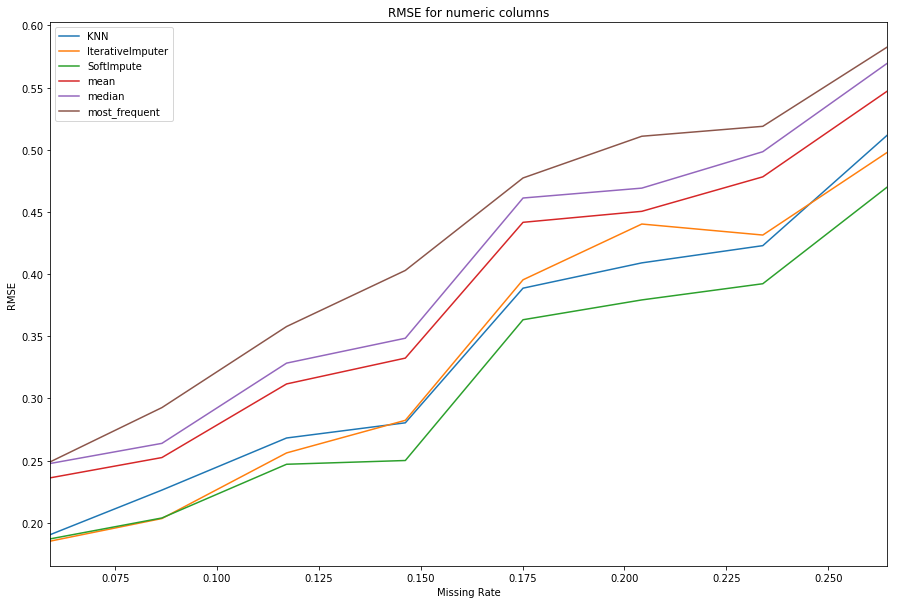

<Figure size 432x288 with 0 Axes>

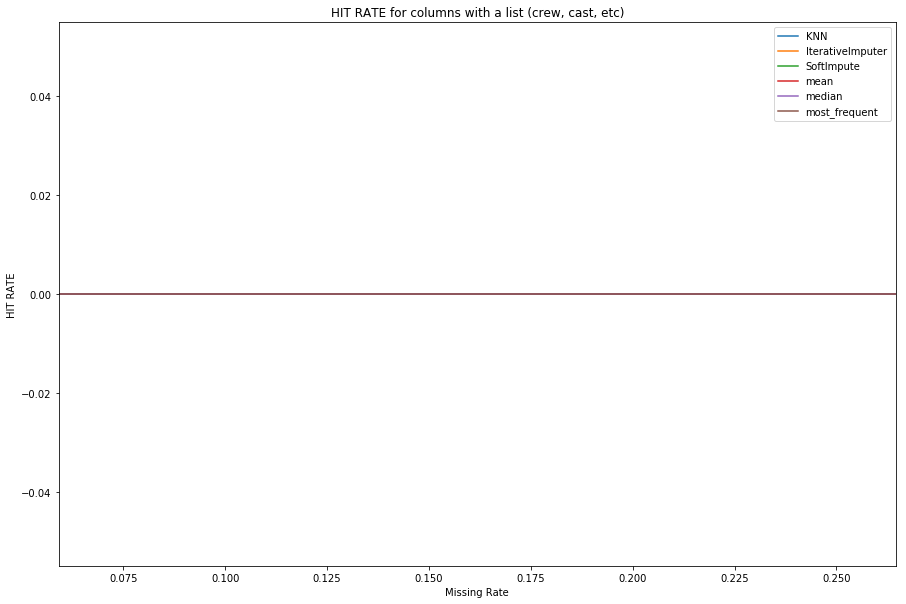

<Figure size 432x288 with 0 Axes>

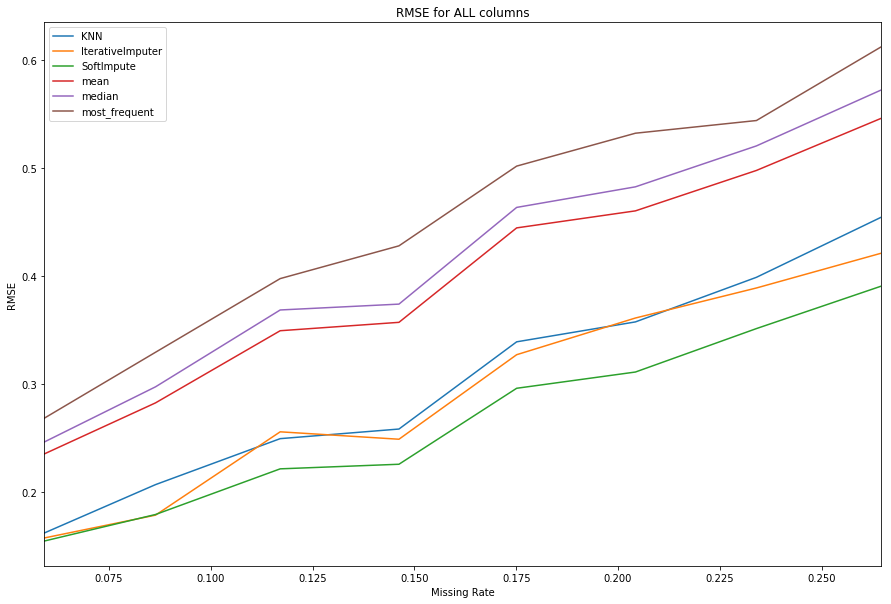

In [94]:
plt.figure()
rmsDict.plot(figsize=(15, 10))
plt.title("RMSE for numeric columns")
plt.ylabel('RMSE')
plt.xlabel('Missing Rate')

plt.figure()
hitDict.plot(figsize=(15, 10))
plt.title("HIT RATE for columns with a list (crew, cast, etc)")
plt.ylabel('HIT RATE')
plt.xlabel('Missing Rate')

plt.figure()
rmsAllDict.plot(figsize=(15, 10))
plt.title("RMSE for ALL columns")
plt.ylabel('RMSE')
plt.xlabel('Missing Rate')

In [95]:
missing_rate_list

[0.059112446550329364,
 0.08647289957240263,
 0.11706922454640009,
 0.14622096382757424,
 0.1751126776840402,
 0.20426441696521438,
 0.23396509880966138,
 0.2645614237836588]

# Normalizing the data and seperating the train and test set

In [96]:
#from https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

from sklearn import preprocessing
#Select numerical columns which needs to be normalized
train_norm = df[df.columns[0:2400]]
test_norm = df[df.columns[2400:3005]]

# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
df.update(training_norm_col)

df.head()

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,0.305793,...,-0.484960,-0.310352,-0.744661,-0.341772,-0.477656,-0.212346,-0.535937,-0.225419,-0.568454,-0.277494
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,-0.394194,...,0.846995,-0.248294,-0.176465,-0.258123,-0.228641,-0.107887,-0.177994,-0.154308,0.264279,-0.178211
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,-0.394194,...,-0.582895,-0.290257,-0.330949,-0.265582,-0.562282,-0.209828,-0.338771,-0.206442,-0.434538,-0.262550
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,-0.394194,...,NaN,NaN,NaN,NaN,-0.452164,-0.213101,-0.505975,-0.229426,-0.616184,-0.281270
4,-1.726855,NaN,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,0.643392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# save to save.csv

df.to_csv('save_Cleaned.csv',index_label = False)
df = pd.read_csv('save_Cleaned.csv')

# Prediction with the chosen imputetion method

In [98]:
#creating df df_pred to do prediction for those with non-nan values > 2000
predicting_list = []
print("These are the columns that we are not doing prediction to fill the empty cell")
for col in df:
    
    if (df[col].count() > 2000):
        predicting_list.append(col)
    else:
        print(col,df[col].count())
predicting_list.remove("revenue")


df_pred = pd.DataFrame()
df_pred = df[predicting_list].copy()

These are the columns that we are not doing prediction to fill the empty cell
belongs_to_collection0_mean 132
belongs_to_collection0_var 132
genres2_mean 1428
genres2_var 1428
production_companies1_mean 1185
production_companies1_var 1185
production_companies2_mean 557
production_companies2_var 557
production_countries1_mean 716
production_countries1_var 716
production_countries2_mean 186
production_countries2_var 186
spoken_languages1_mean 860
spoken_languages1_var 860
spoken_languages2_mean 317
spoken_languages2_var 317


In [99]:
#cause knn dosent accept a string heading, so changng the heading
df_pred.columns = range(df_pred.shape[1])
df_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,0.305793,0.119747,NaN,NaN,...,-0.484960,-0.310352,-0.744661,-0.341772,-0.477656,-0.212346,-0.535937,-0.225419,-0.568454,-0.277494
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,-0.394194,-0.234565,-0.667050,-0.565860,...,0.846995,-0.248294,-0.176465,-0.258123,-0.228641,-0.107887,-0.177994,-0.154308,0.264279,-0.178211
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.394194,-0.234565,NaN,NaN,...,-0.582895,-0.290257,-0.330949,-0.265582,-0.562282,-0.209828,-0.338771,-0.206442,-0.434538,-0.262550
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.394194,-0.234565,-0.212953,-0.399303,...,NaN,NaN,NaN,NaN,-0.452164,-0.213101,-0.505975,-0.229426,-0.616184,-0.281270
4,-1.726855,NaN,0.160657,-0.604463,0.547406,0.461507,0.643392,0.308108,1.027674,1.206886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
#checking if everything is in float for df
for x in df:
    for y in range(len(df)):
        if not (isinstance(df[x][y], float) or isinstance(df[x][y], int) or math.isnan(float(df[x][y]))):
            print(x,y,df[x][y],type(df[x][y]))

In [101]:
# finally doing the prediction lol ==" i want to cry
from fancyimpute import SoftImpute 

now = time.time()

df_pred = pd.DataFrame(SoftImpute(verbose=False).fit_transform(df_pred))

#adding back the columns for df_pred
df_pred.columns = predicting_list

print(time.time() - now)

#merging df with df_pred
for col in df_pred:
    df[col] = df_pred[col]
    
df.head()

0.4847116470336914


,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,0.305793,...,-0.484960,-0.310352,-0.744661,-0.341772,-0.477656,-0.212346,-0.535937,-0.225419,-0.568454,-0.277494
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,-0.394194,...,0.846995,-0.248294,-0.176465,-0.258123,-0.228641,-0.107887,-0.177994,-0.154308,0.264279,-0.178211
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,-0.394194,...,-0.582895,-0.290257,-0.330949,-0.265582,-0.562282,-0.209828,-0.338771,-0.206442,-0.434538,-0.262550
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,-0.394194,...,-0.327269,-0.167703,-0.229952,-0.056413,-0.452164,-0.213101,-0.505975,-0.229426,-0.616184,-0.281270
4,-1.726855,0.038904,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,0.643392,...,-0.022125,0.009950,0.118457,0.128074,-0.003747,-0.021688,-0.014224,-0.029175,-0.021422,-0.006265


In [102]:
# save to save.csv
df.to_csv('save_Predicted.csv',index_label = False)
df0 = pd.read_csv('save_Cleaned.csv')
df1 = pd.read_csv('save_Predicted.csv')

In [103]:
df0.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,0.305793,...,-0.484960,-0.310352,-0.744661,-0.341772,-0.477656,-0.212346,-0.535937,-0.225419,-0.568454,-0.277494
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,-0.394194,...,0.846995,-0.248294,-0.176465,-0.258123,-0.228641,-0.107887,-0.177994,-0.154308,0.264279,-0.178211
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,-0.394194,...,-0.582895,-0.290257,-0.330949,-0.265582,-0.562282,-0.209828,-0.338771,-0.206442,-0.434538,-0.262550
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,-0.394194,...,NaN,NaN,NaN,NaN,-0.452164,-0.213101,-0.505975,-0.229426,-0.616184,-0.281270
4,-1.726855,NaN,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,0.643392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,0.305793,...,-0.484960,-0.310352,-0.744661,-0.341772,-0.477656,-0.212346,-0.535937,-0.225419,-0.568454,-0.277494
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,-0.394194,...,0.846995,-0.248294,-0.176465,-0.258123,-0.228641,-0.107887,-0.177994,-0.154308,0.264279,-0.178211
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,-0.394194,...,-0.582895,-0.290257,-0.330949,-0.265582,-0.562282,-0.209828,-0.338771,-0.206442,-0.434538,-0.262550
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,-0.394194,...,-0.327269,-0.167703,-0.229952,-0.056413,-0.452164,-0.213101,-0.505975,-0.229426,-0.616184,-0.281270
4,-1.726855,0.038904,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,0.643392,...,-0.022125,0.009950,0.118457,0.128074,-0.003747,-0.021688,-0.014224,-0.029175,-0.021422,-0.006265
